# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore') 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\victo\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Read your api key environment variable
load_dotenv()
apikey = os.getenv("NEWSAPI")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = apikey)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []
for article in btc_headlines['articles']:
    text = article['content']
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment['compound']
    positive = sentiment['pos']
    negative = sentiment['neg']
    neutral = sentiment['neu']
    dictionary = {'positive': positive, 'negative': negative, 'neutral': neutral, 'compound': compound, 'text': text}
    btc_sentiment.append(dictionary)
btc_df = pd.DataFrame(btc_sentiment)
btc_df

,compound,negative,neutral,positive,text
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...
3,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...
4,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
5,0.2732,0.000,0.903,0.097,"As longtime TechCrunch readers know well, Mich..."
6,0.1280,0.075,0.836,0.089,"SINGAPORE, July 28 (Reuters) - Bitcoin broke a..."
7,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...
8,0.0000,0.000,1.000,0.000,A representation of virtual currency Bitcoin i...
9,-0.4767,0.088,0.912,0.000,James Martin/CNET\r\nA UK man was arrested in ...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []
for article in eth_headlines['articles']:
    text = article['content']
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment['compound']
    positive = sentiment['pos']
    negative = sentiment['neg']
    neutral = sentiment['neu']
    dictionary = {'positive': positive, 'negative': negative, 'neutral': neutral, 'compound': compound, 'text': text}
    eth_sentiment.append(dictionary)
eth_df = pd.DataFrame(eth_sentiment)
eth_df

,compound,negative,neutral,positive,text
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...
1,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...
2,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
3,0.3400,0.000,0.895,0.105,Cryptocurrencies spiked Monday after Amazon li...
4,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
5,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu..."
6,0.0000,0.000,1.000,0.000,Representations of cryptocurrency Ethereum are...
7,0.7717,0.000,0.806,0.194,"Ether holders have ""staked"" more than $13 bill..."
8,0.6249,0.000,0.850,0.150,Ether is the cryptocurrency of the ethereum ne...
9,0.0000,0.000,1.000,0.000,All the sessions from Transform 2021 are avail...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.105702,0.032850,0.907300,0.059830
std,0.382007,0.058092,0.084804,0.066715
min,-0.827100,0.000000,0.653000,0.000000
25%,-0.029800,0.000000,0.856750,0.000000
50%,0.000000,0.000000,0.914500,0.055500
75%,0.386825,0.062250,1.000000,0.095500
max,0.883400,0.287000,1.000000,0.276000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.140281,0.019850,0.929660,0.050470
std,0.319297,0.042281,0.072627,0.059671
min,-0.812600,0.000000,0.714000,0.000000
25%,0.000000,0.000000,0.876000,0.000000
50%,0.000000,0.000000,0.930500,0.000000
75%,0.406800,0.000000,1.000000,0.093250
max,0.771700,0.249000,1.000000,0.194000


### Questions:

Q: Which coin had the highest mean positive score?

A:BTC had the heighest mean.

Q: Which coin had the highest compound score?

A: BTC had the highest compound score.

Q. Which coin had the highest positive score?

A: BTC had the heighest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = stopwords.words('english')

# Expand the default stopwords list if necessary
stopwords.extend(punctuation)


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    tokenlist = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer_list = []
    for word in tokenlist:
        lemmatizer_list.append(lemmatizer.lemmatize(word))
        
    # Convert the words to lowercase
    lemmatizer_list_lower = []
    for word in lemmatizer_list:
        lemmatizer_list_lower.append(word.lower())
        
    
    # Remove the stop words
    finaltoken = []
    for word in lemmatizer_list_lower:
        if word not in stopwords:
            finaltoken.append(word)
        
    
    
    return finaltoken

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, ha, r..."
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
4,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startup, heating,..."
2,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
3,0.3400,0.000,0.895,0.105,Cryptocurrencies spiked Monday after Amazon li...,"[cryptocurrencies, spiked, monday, amazon, lis..."
4,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[bitcoin, ethereumyuriko, nakaoether, overtook..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = tokenizer(btc_df['text'].str.cat())
btc_ngram_count = Counter(ngrams(btc_ngram, 2))
btc_ngram_count

Counter({('like', 'dogecoin'): 1,
         ('dogecoin', 'devotee'): 1,
         ('devotee', 'mayor'): 1,
         ('mayor', 'reno'): 1,
         ('reno', 'leader'): 1,
         ('leader', 'el'): 1,
         ('el', 'salvador'): 3,
         ('salvador', 'aldo'): 1,
         ('aldo', 'baoicchi'): 1,
         ('baoicchi', 'convinced'): 1,
         ('convinced', 'cryptocurrency'): 1,
         ('cryptocurrency', 'future'): 1,
         ('future', 'ceo'): 1,
         ('ceo', 'founder'): 1,
         ('founder', 'canadian'): 1,
         ('canadian', 'scooter'): 1,
         ('scooter', 'maker'): 1,
         ('maker', 'daymak'): 1,
         ('daymak', 'belief'): 1,
         ('belief', 'charsfiled'): 1,
         ('charsfiled', 'underthe'): 1,
         ('underthe', 'supply'): 1,
         ('supply', 'chain'): 1,
         ('chain', 'attack'): 1,
         ('attack', 'ha'): 2,
         ('ha', 'reached'): 1,
         ('reached', 'thousand'): 1,
         ('thousand', 'organizationsillustration'): 1,
     

In [17]:
# Generate the Ethereum N-grams where N=2
eth_ngram = tokenizer(eth_df['text'].str.cat())
eth_ngram_count = Counter(ngrams(eth_ngram, 2))
eth_ngram_count

Counter({('many', 'blockchain'): 1,
         ('blockchain', 'platform'): 1,
         ('platform', 'competing'): 1,
         ('competing', 'investor'): 1,
         ('investor', 'developer'): 1,
         ('developer', 'attention'): 1,
         ('attention', 'right'): 1,
         ('right', 'big'): 1,
         ('big', 'daddy'): 1,
         ('daddy', 'ethereum'): 1,
         ('ethereum', 'socalled'): 1,
         ('socalled', 'ethereum'): 1,
         ('ethereum', 'killers'): 1,
         ('killers', 'like'): 1,
         ('like', 'solana'): 1,
         ('solana', 'wrote'): 1,
         ('wrote', 'charsblockchain'): 1,
         ('charsblockchain', 'infrastructure'): 1,
         ('infrastructure', 'startup'): 1,
         ('startup', 'heating'): 1,
         ('heating', 'industry'): 1,
         ('industry', 'fervor'): 1,
         ('fervor', 'brings'): 1,
         ('brings', 'developer'): 1,
         ('developer', 'user'): 1,
         ('user', 'space'): 1,
         ('space', 'still'): 1,
         ('

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_ngram, 10)

[('bitcoin', 65),
 ('reuters', 35),
 ('july', 22),
 ('cryptocurrency', 21),
 ('illustration', 19),
 ('taken', 17),
 ('seen', 16),
 ('ha', 15),
 ('currency', 13),
 ('world', 12)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_ngram, 10)

[('ethereum', 36),
 ('bitcoin', 34),
 ('cryptocurrencies', 26),
 ('cryptocurrency', 26),
 ('illustration', 23),
 ('taken', 22),
 ('june', 21),
 ('reutersdado', 17),
 ('reuters', 15),
 ('charsrepresentations', 14)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

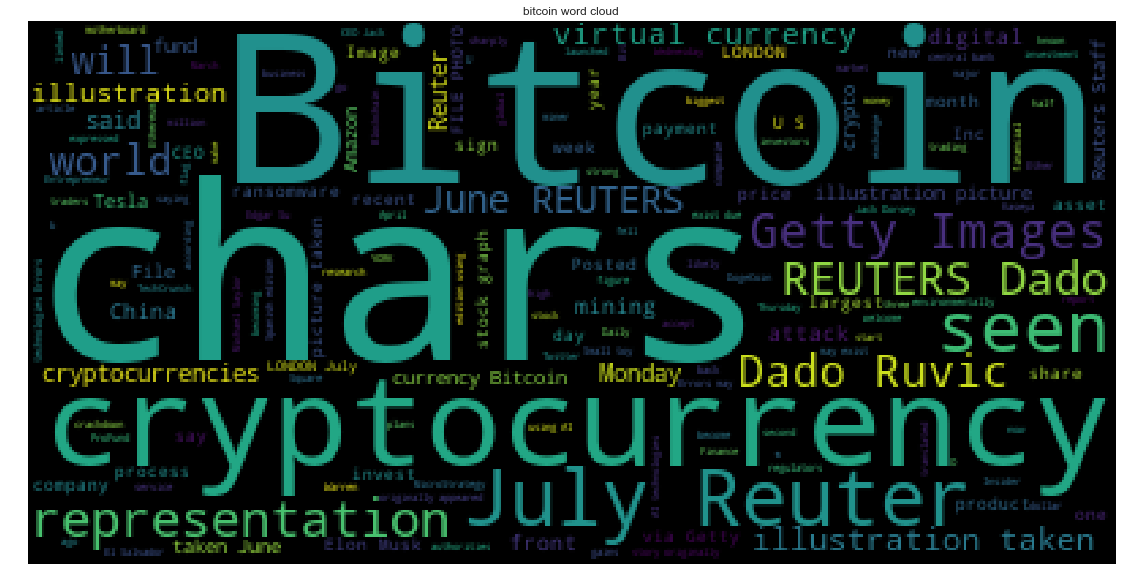

In [30]:
# Generate the Bitcoin word cloud
btc_cloud = WordCloud(background_color= 'black').generate(btc_df['text'].str.cat())
plt.axis('off')
plt.title('bitcoin word cloud')
plt.imshow(btc_cloud)

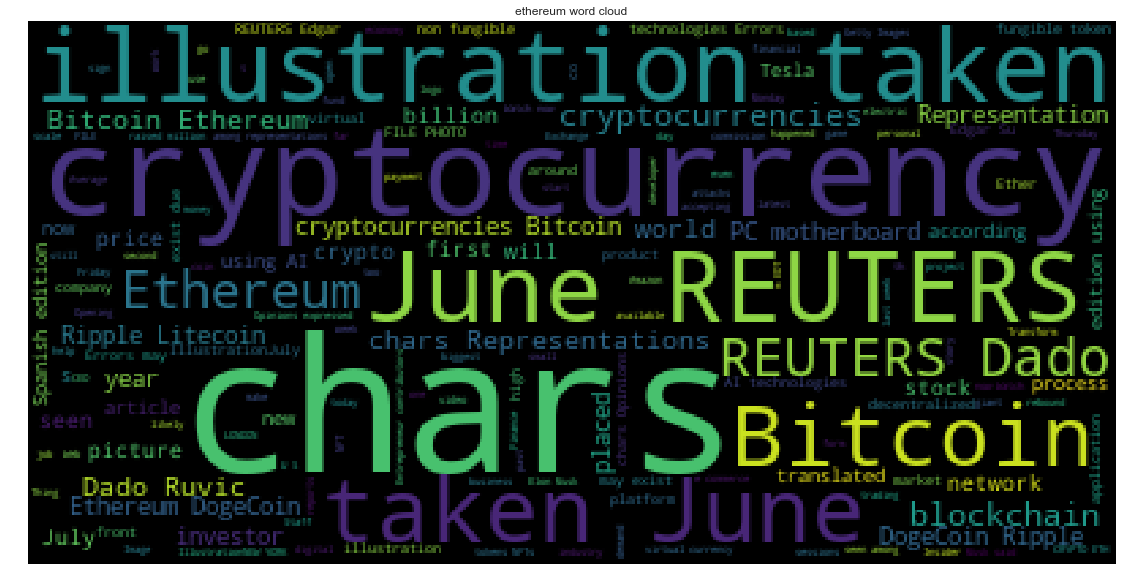

In [32]:
# Generate the Ethereum word cloud
eth_cloud = WordCloud(background_color= 'black').generate(eth_df['text'].str.cat())
plt.axis('off')
plt.title('ethereum word cloud')
plt.imshow(eth_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [38]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [39]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [40]:
# Concatenate all of the Bitcoin text together
btc_all = btc_df['text'].str.cat()

In [41]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_all)

# Add a title to the document
btc_ner.user_data['title'] = 'BTC NER'

In [43]:
# Render the visualization
displacy.render(btc_ner, style = 'ent')

In [45]:
# List all Entities
for entity in btc_ner.ents:
    print(entity.text, entity.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
March 15, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
June 30 DATE
Reuters ORG
Martin/CNET
A ORG
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
May 19, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Reuters ORG
5.17% PERCENT
33 MONEY
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado R

---

### Ethereum NER

In [46]:
# Concatenate all of the Ethereum text together
eth_all = eth_df['text'].str.cat()

In [47]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_all)

# Add a title to the document
eth_ner.user_data['title'] = 'ETH NER'

In [49]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [50]:
# List all Entities
for entity in eth_ner.ents:
    print(entity.text, entity.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Monday DATE
Amazon ORG
Amazon ORG
Ethereum
 ORG
Yuriko Nakao PERSON
Friday DATE
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
$40 billion MONEY
2025 DATE
JPMorgan ORG
recent months DATE
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Reuters ORG
FILE ORG
June 7, 2021 DATE
REUTERS ORG
Edgar Su/Illustration/File Photo PERSON
Reuters ORG
+304 ORG
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum OR

---